# Bank Marketing
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`). 

In [22]:
import pandas as pd
bm = pd.read_csv("bank-marketing.csv", sep=";")
bm.head(100)

age          job   marital  ... euribor3m nr.employed   y
0    56    housemaid   married  ...     4.857      5191.0  no
1    57     services   married  ...     4.857      5191.0  no
2    37     services   married  ...     4.857      5191.0  no
3    40       admin.   married  ...     4.857      5191.0  no
4    56     services   married  ...     4.857      5191.0  no
..  ...          ...       ...  ...       ...         ...  ..
95   45     services   married  ...     4.857      5191.0  no
96   42   management   married  ...     4.857      5191.0  no
97   53       admin.  divorced  ...     4.857      5191.0  no
98   37   technician    single  ...     4.857      5191.0  no
99   44  blue-collar   married  ...     4.857      5191.0  no

[100 rows x 21 columns]

## Data Dictionary
| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   | 
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

**Citations**:  
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. 

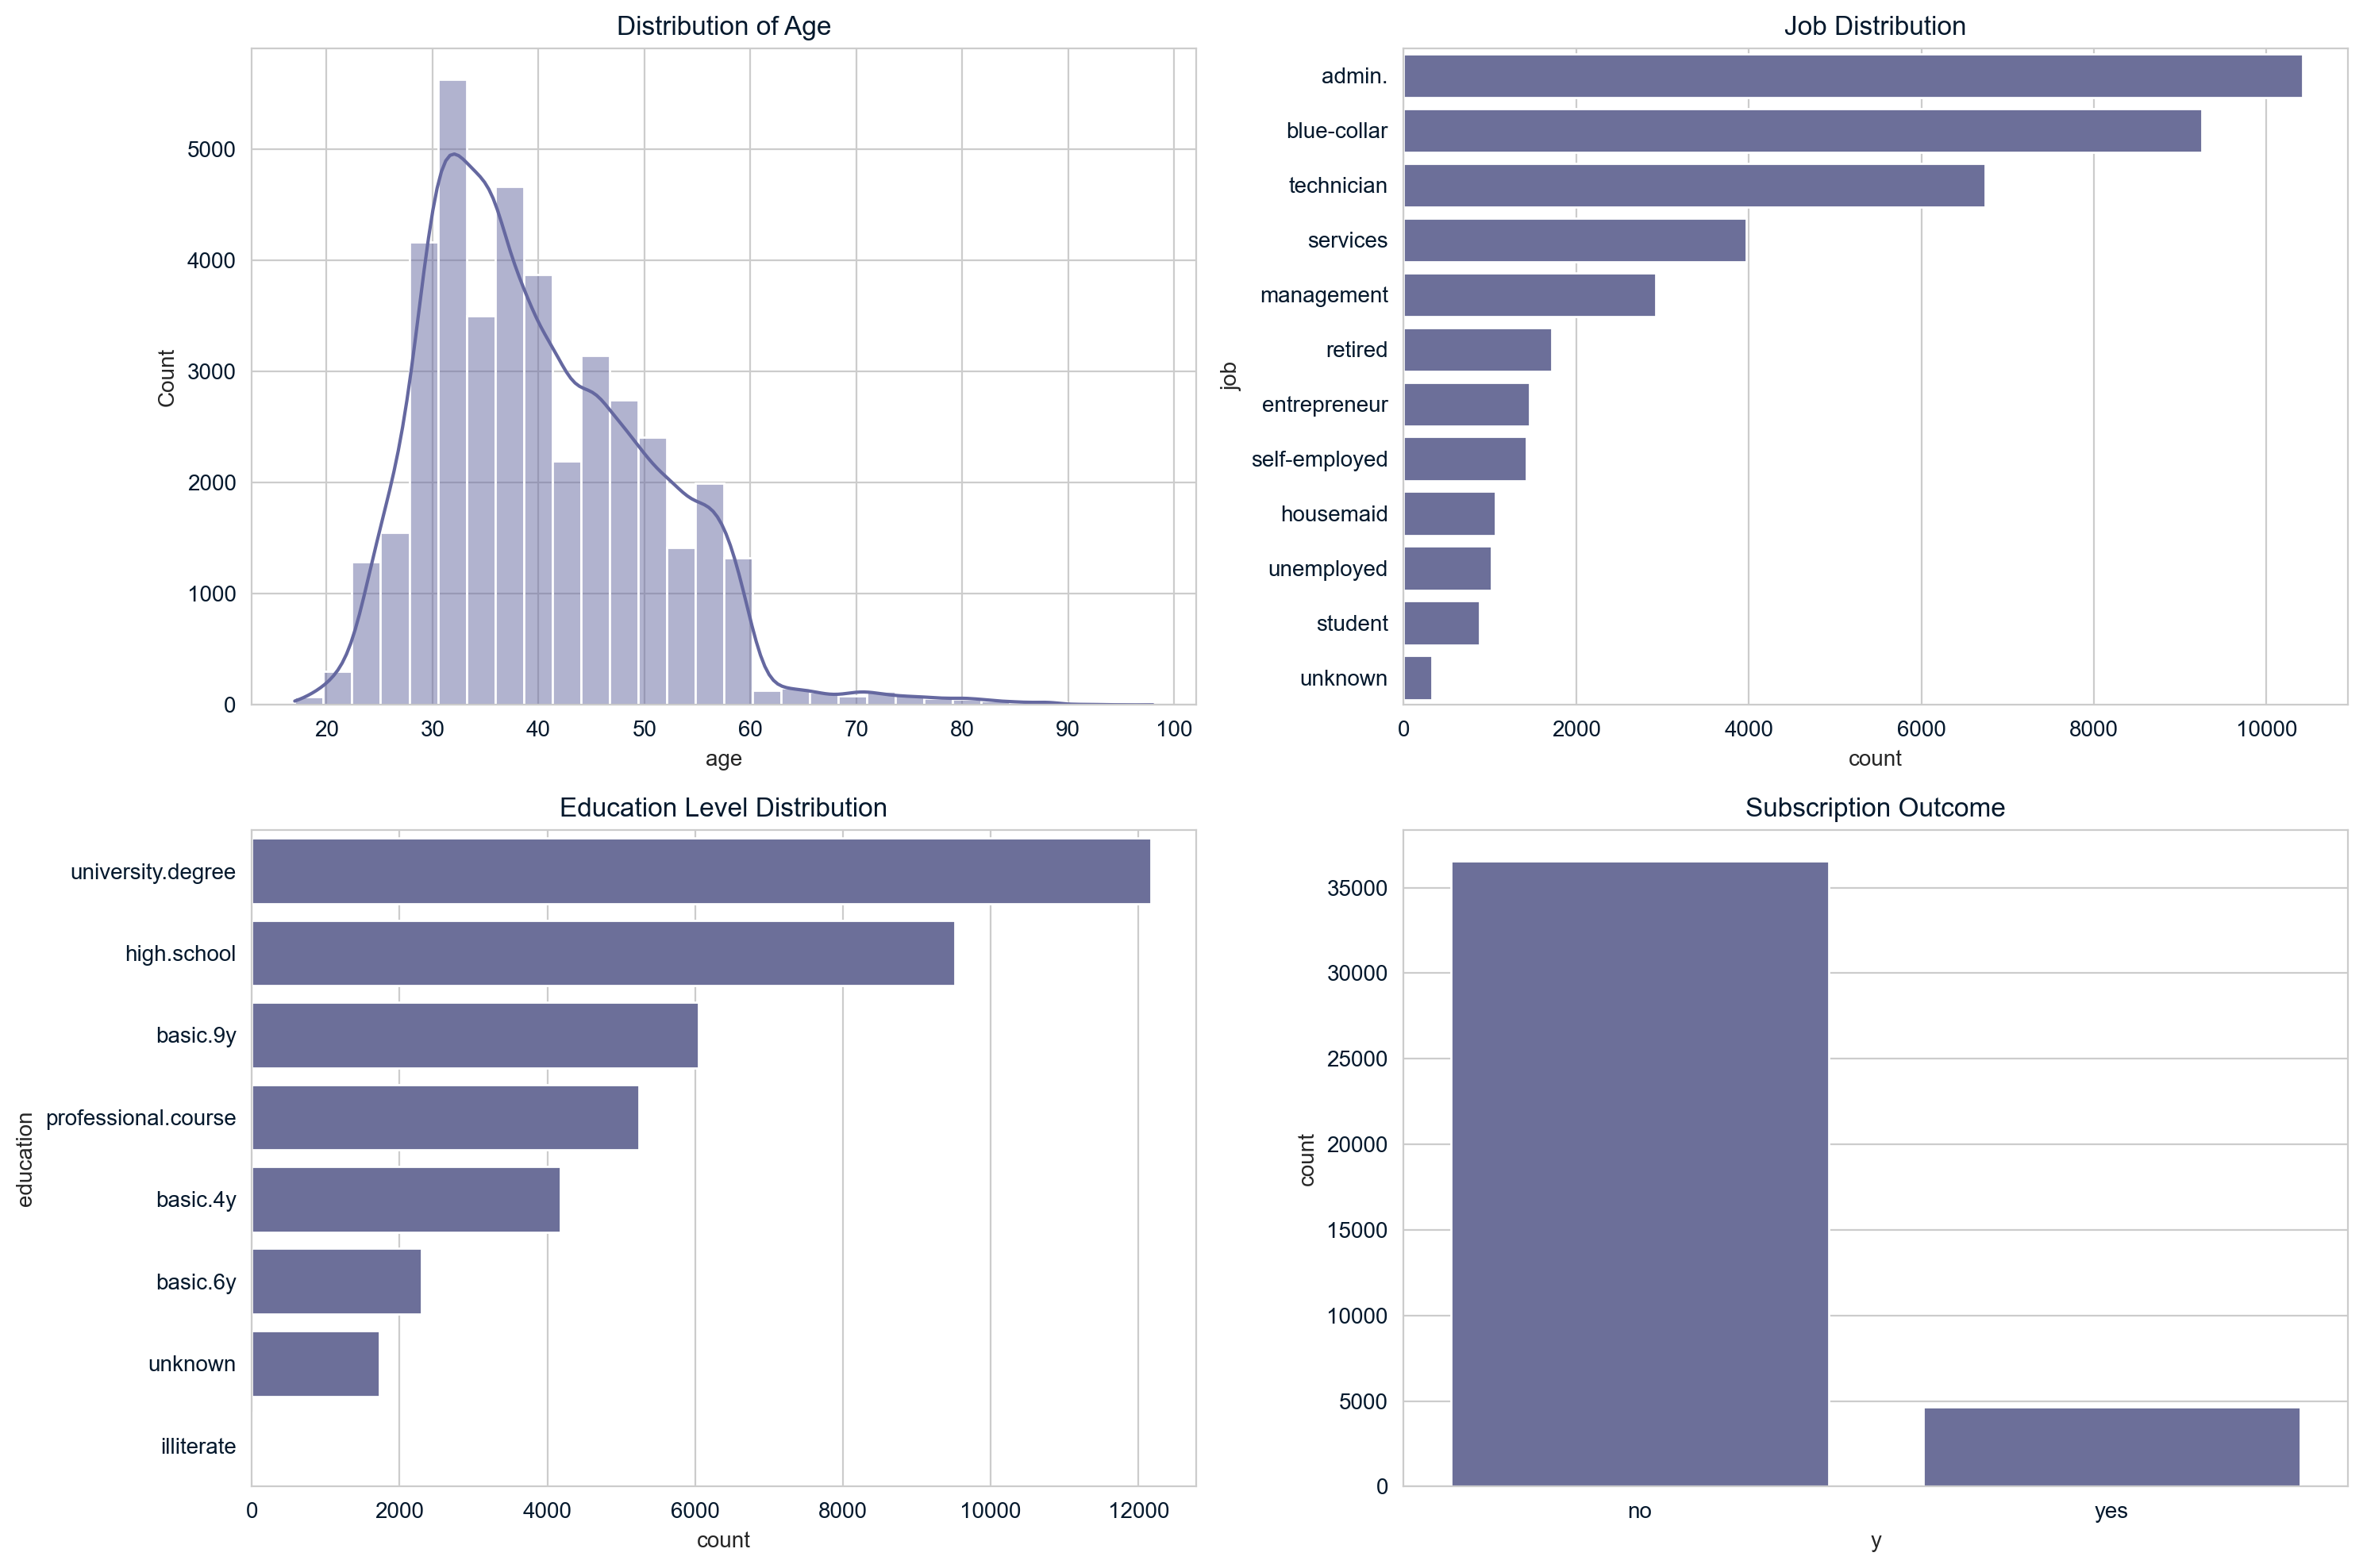

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(bm['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.countplot(y=bm['job'], order=bm['job'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Job Distribution')

sns.countplot(y=bm['education'], order=bm['education'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Education Level Distribution')

sns.countplot(x=bm['y'], ax=axes[1, 1])
axes[1, 1].set_title('Subscription Outcome')

plt.tight_layout()

plt.show()

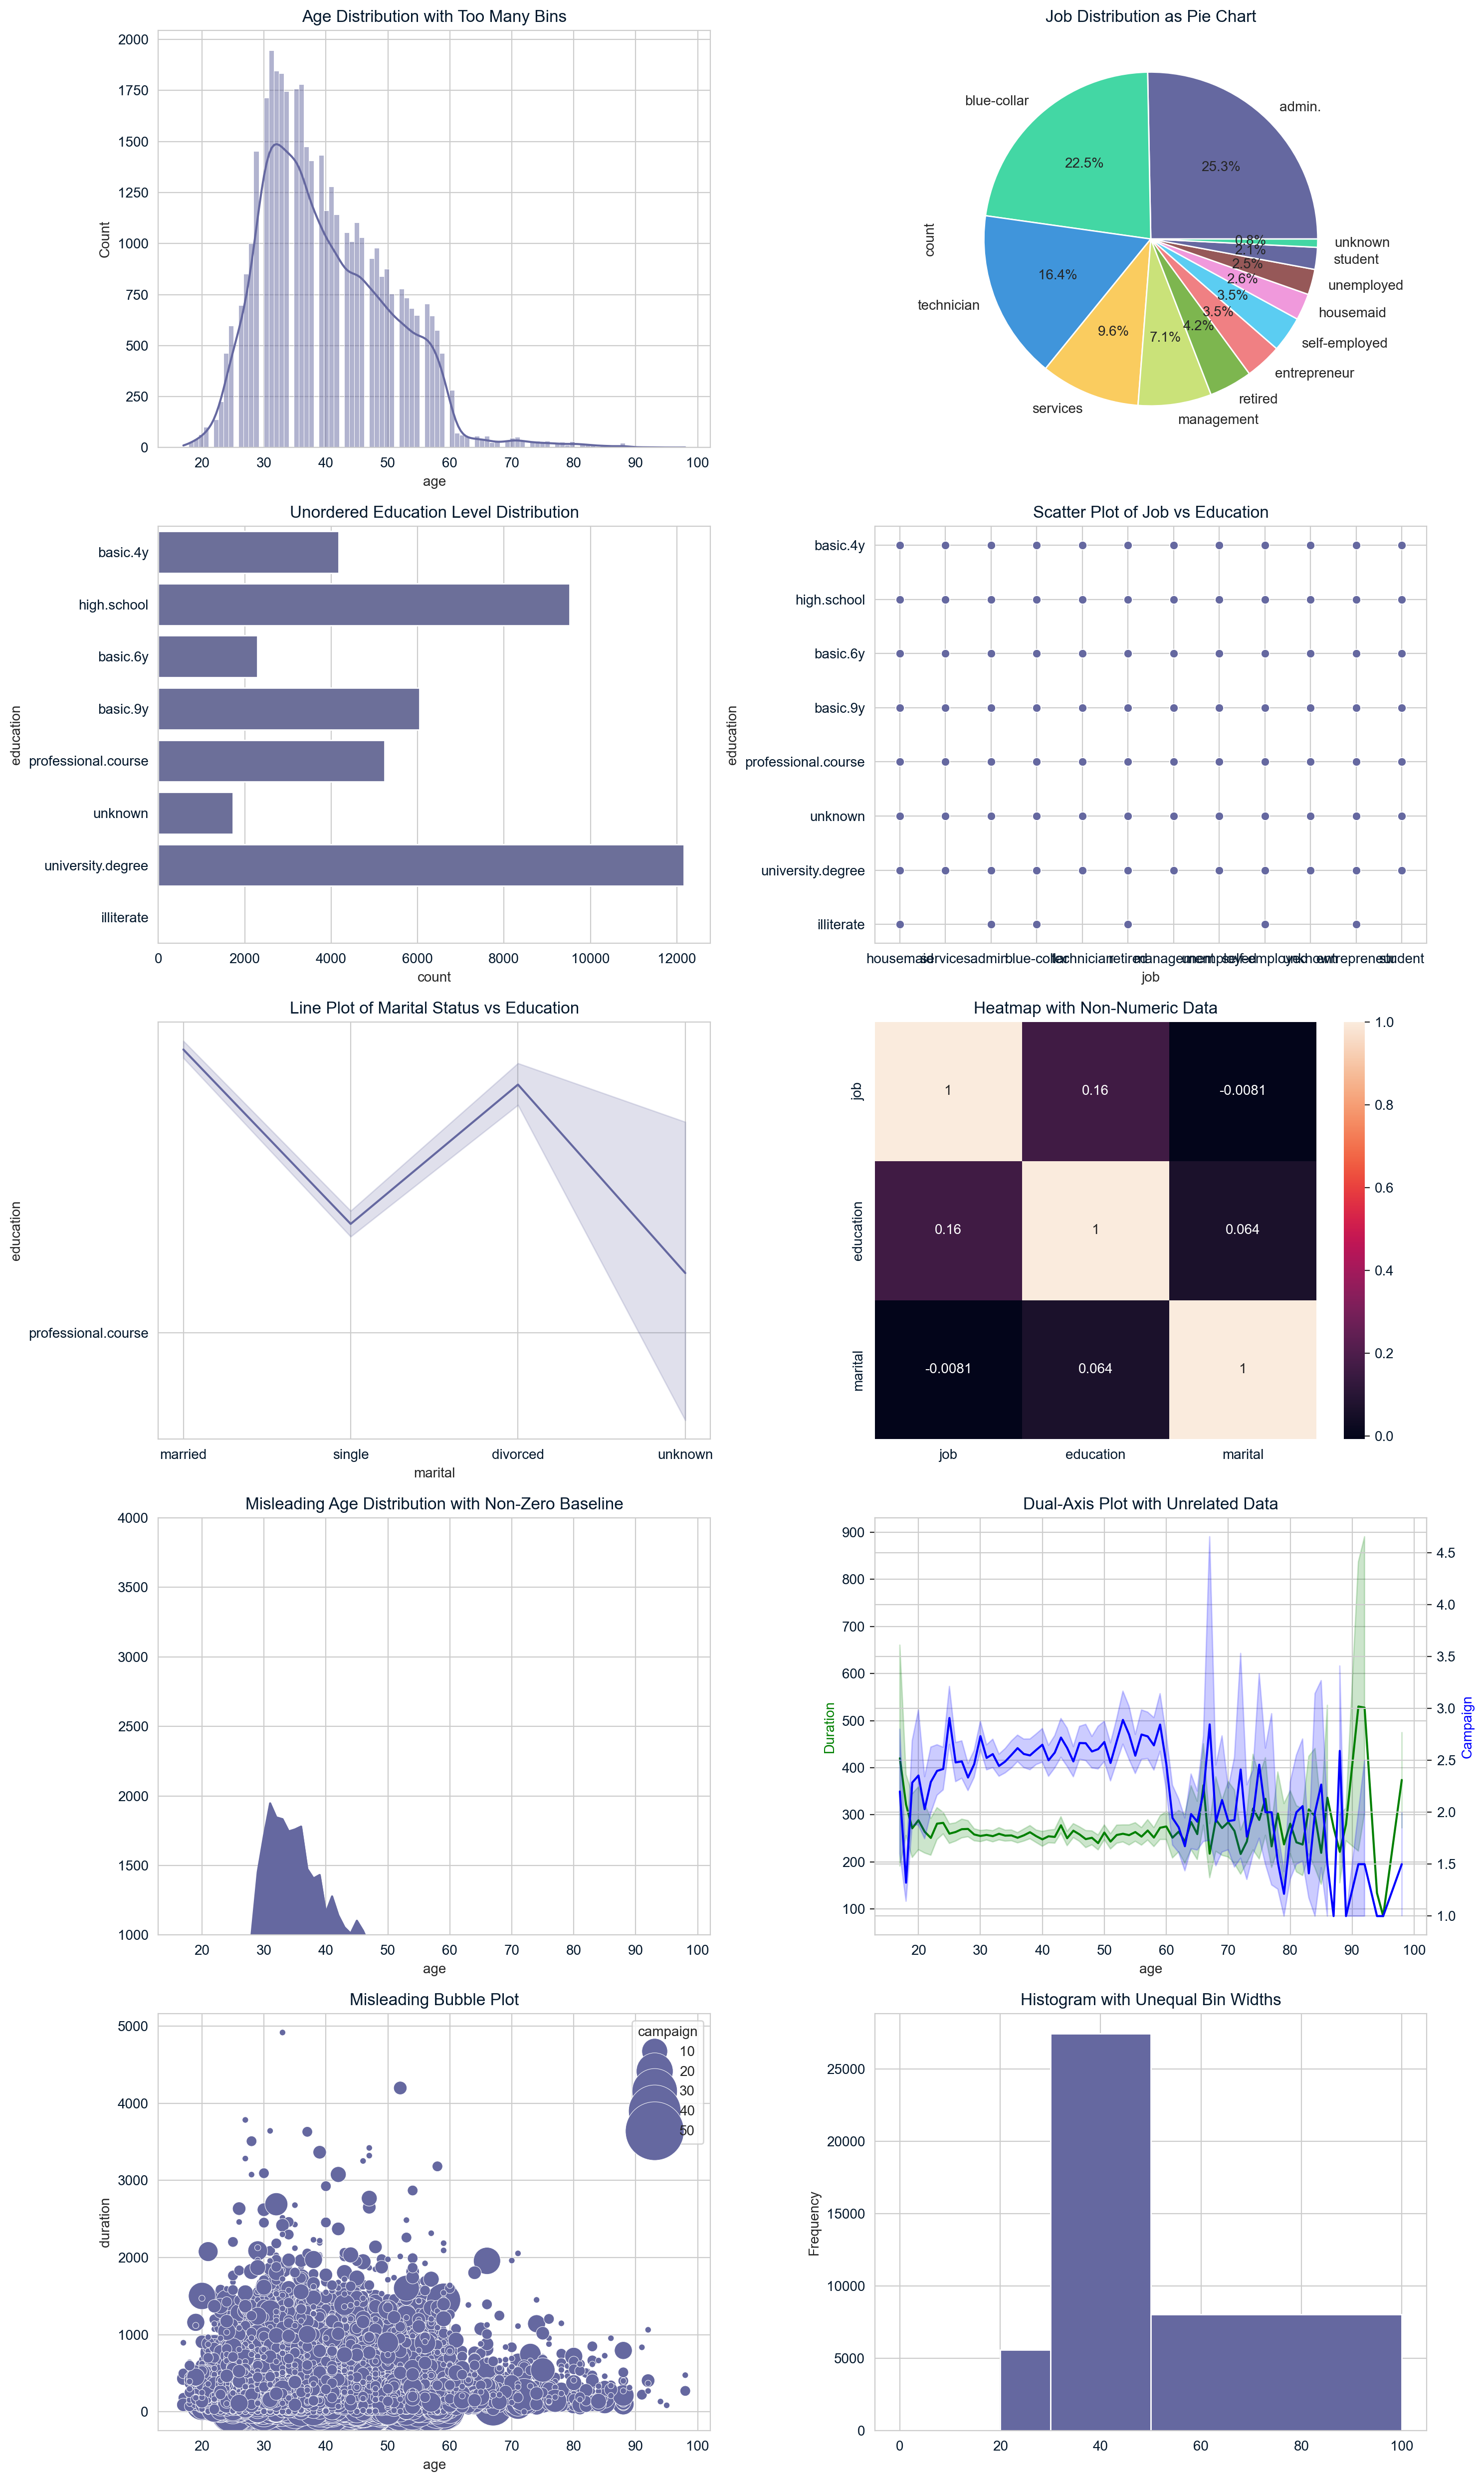

In [41]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25))

sns.histplot(bm['age'], bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution with Too Many Bins')

bm['job'].value_counts().plot.pie(ax=axes[0, 1], autopct='%1.1f%%')
axes[0, 1].set_title('Job Distribution as Pie Chart')

sns.countplot(y=bm['education'], ax=axes[1, 0])
axes[1, 0].set_title('Unordered Education Level Distribution')

sns.scatterplot(x=bm['job'], y=bm['education'], ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Job vs Education')

sns.lineplot(x=bm['marital'], y=bm['education'], ax=axes[2, 0])
axes[2, 0].set_title('Line Plot of Marital Status vs Education')

bm_numeric = bm[['job', 'education', 'marital']].apply(lambda x: pd.factorize(x)[0])
sns.heatmap(bm_numeric.corr(), annot=True, ax=axes[2, 1])
axes[2, 1].set_title('Heatmap with Non-Numeric Data')

bm['age'].value_counts().sort_index().plot.area(ax=axes[3, 0])
axes[3, 0].set_ylim(1000, 4000)
axes[3, 0].set_title('Misleading Age Distribution with Non-Zero Baseline')

ax1 = axes[3, 1]
ax2 = ax1.twinx()
sns.lineplot(x=bm['age'], y=bm['duration'], ax=ax1, color='g')
sns.lineplot(x=bm['age'], y=bm['campaign'], ax=ax2, color='b')
ax1.set_title('Dual-Axis Plot with Unrelated Data')
ax1.set_ylabel('Duration', color='g')
ax2.set_ylabel('Campaign', color='b')

sns.scatterplot(x=bm['age'], y=bm['duration'], size=bm['campaign'], sizes=(20, 2000), ax=axes[4, 0])
axes[4, 0].set_title('Misleading Bubble Plot')

bm['age'].plot.hist(bins=[0, 10, 20, 30, 50, 100], ax=axes[4, 1])
axes[4, 1].set_title('Histogram with Unequal Bin Widths')

plt.tight_layout()

plt.show()

## Seatwork Questions on Bad Visualizations

1. **Age Distribution with Too Many Bins**  
   Why is using 100 bins for the age distribution histogram potentially problematic?

2. **Job Distribution as Pie Chart**  
   What are the limitations of using a pie chart to represent the distribution of job categories? 

3. **Unordered Education Level Distribution**  
   What is the issue with the count plot of education levels in terms of order?

4. **Scatter Plot of Job vs Education**  
   Why might a scatter plot of job vs education be a poor choice for visualizing this data?

5. **Line Plot of Marital Status vs Education**  
   Why is a line plot not suitable for visualizing the relationship between marital status and education?

6. **Heatmap with Non-Numeric Data**  
   What is the problem with creating a heatmap using non-numeric data?

7. **Misleading Age Distribution with Non-Zero Baseline**  
   Why is setting a non-zero baseline for the age distribution area plot misleading?

8. **Dual-Axis Plot with Unrelated Data**  
   What are the potential issues with using a dual-axis plot to display the duration and campaign data?

9. **Misleading Bubble Plot**  
   Why might the bubble plot of age vs duration with campaign size be misleading?

10. **Histogram with Unequal Bin Widths**  
    What is the problem with using unequal bin widths in the age histogram?